# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1303 Самохин Кирилл. Вариант №18.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введём ряд понятий:

$ \lambda(n) = \lfloor \log_{2}(n)\rfloor $ - уменьшенная на 1 длина бинарной записи числа n.

$ \nu(n) $ - вес Хэмминга для бинарной записи (количество не нулевых цифр в записи числа).

### Бинарный метод *SX*

1. Представить n в бинарном виде: $ n = (a_{m}, a_{m-1}, ... , a_{1})_{2} $, причём $a_{m} = 1 $.
2. Отбросить старший бит: $ (a_{m-1}, ... , a_{1})_{2} $.
3. Провести преобразование путём замены:
    * $a_{i} = 1 \Rightarrow a_{i} = SX $
    * $a_{i} = 0 \Rightarrow a_{i} = X $
4. В результате получается строка, с помощью которой можно понять, какие действия необходимо произвести над x для вычисления для возведения его в степень n:
    * $S$ - возведение в квадрат
    * $X$ - умножение на x.
    
Число операций для этого метода: $\lambda(n) + \nu(n) - 1$

### Метод справа-налево

1. Значения на нулевой итерации: $ N = n, Y = 1, Z = x $
2. Если N - чётное, то дели его на 2 и возводим Z в квадрат, в противном случае (N - нечётное) также делим N пополам, умножаем Y на Z и возводим Z  квадрат.
3. Повторяем действия в п.2 до тех пор, пока N не окажется равен 0. После завершения итераций возвращаем Y.

Число операций для этого метода:  $\lambda(n) + \nu(n)$

### Метод множителей

1. Представить n в виде: $n = p \cdot q$, где $n$ - наименьший простой множитель, а $q \gt 0$. Чтобы найти искомый $x^n$, необходимо вычислить $x^p$ и возвести результат в степень $q$.
2. Если n - простое, вычисляем $x^{n-1}$ и умножаем на $x$.
3. При $n = 1$, получим $x^n$.

### Дерево степеней

1. На нулевом уровне (корне) дерева расположен узел 1.
2. $k+1-й$ уровень дерева строится по следующему правилу: на уровне $k$ берётся узел n, и к нему присоединяюются узлы $n+a_0, n+a_1, ... , n+a_{k-1}$. Где $\{a_i\}_{i=0}^{k-1}$ - путь от корня дерева 1 до узла n.
3. Если узел уже был добавлен в дерево, повторно мы его не добавляем.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод SX

Разработаем функцию, реализующую бинарный метод SX:

In [12]:
def SX_method(n):
    bin_n = bin(n)[3:]
    bin_n = bin_n.replace('0', 'S').replace('1', 'SX')
    res = var('x')
    print("Получена строка: ", bin_n)
    for i, el in enumerate(bin_n):
        if el == 'S':
            res^=2
        else:
            res*=x
        print(f'(Итерация №{i+1}: {res})')
    return res    

Протестируем написанную функцию на числах: 8, 93, 149

In [30]:
SX_method(8)

Получена строка:  SSS
(Итерация №1: x^2)
(Итерация №2: x^4)
(Итерация №3: x^8)


x^8

In [15]:
SX_method(93)

Получена строка:  SSXSXSXSSX
(Итерация №1: x^2)
(Итерация №2: x^4)
(Итерация №3: x^5)
(Итерация №4: x^10)
(Итерация №5: x^11)
(Итерация №6: x^22)
(Итерация №7: x^23)
(Итерация №8: x^46)
(Итерация №9: x^92)
(Итерация №10: x^93)


x^93

In [17]:
SX_method(149)

Получена строка:  SSSXSSXSSX
(Итерация №1: x^2)
(Итерация №2: x^4)
(Итерация №3: x^8)
(Итерация №4: x^9)
(Итерация №5: x^18)
(Итерация №6: x^36)
(Итерация №7: x^37)
(Итерация №8: x^74)
(Итерация №9: x^148)
(Итерация №10: x^149)


x^149

Проведём теоретическую оценку числа операций для выбранных тестовых значений:

$n = 8 \Rightarrow \lambda(8) = \lfloor \log_{2}(8)\rfloor = 3; \nu(8) = 1; \lambda(8) + \nu(8) - 1 = 3 \rightarrow $ *верно*

$n = 93 \Rightarrow \lambda(93) = \lfloor \log_{2}(93)\rfloor = 6; \nu(93) = 5; \lambda(93) + \nu(93) - 1 = 10 \rightarrow $ *верно*

$n = 149 \Rightarrow \lambda(149) = \lfloor \log_{2}(149)\rfloor = 7; \nu(149) = 4; \lambda(149) + \nu(149) - 1 = 10 \rightarrow $ *верно*

Проведённые вычисления подтверждают корректность работы реализованного алгоритма.

#### Вывод

Реализован бинарный метод SX. Корректность работы проверена на трёх разных значениях, полученное число итераций совпало с теоретической оценкой для данного метода. В ходе тестов обнаружено, что, с увеличением числа единиц в бинарной записи числа, также увеличивается и количество итериций.

### 2. Метод справа-налево

Разработаем функцию, реализующую бинарный метод возведения в степень справа-налево:

In [33]:
def RL_method(n):
    N = n
    Y = 1
    Z = var('x')
    i = 0
    print(f'iteration №{i}: N={N}, Y={Y}, Z={Z}')
    while True:
        if N%2:
            N = floor(N/2)
            Y*=Z
            if (N == 0):
                i += 1
                print(f'iteration №{i}: N={N}, Y={Y}, Z={Z}')
                break
            Z^=2
        else:
            N = floor(N/2)
            Z^=2
        i+=1
        print(f'iteration №{i}: N={N}, Y={Y}, Z={Z}')
    return Y

In [38]:
RL_method(8)

iteration №0: N=8, Y=1, Z=x
iteration №1: N=4, Y=1, Z=x^2
iteration №2: N=2, Y=1, Z=x^4
iteration №3: N=1, Y=1, Z=x^8
iteration №4: N=0, Y=x^8, Z=x^8


x^8

In [35]:
RL_method(93)

iteration №0: N=93, Y=1, Z=x
iteration №1: N=46, Y=x, Z=x^2
iteration №2: N=23, Y=x, Z=x^4
iteration №3: N=11, Y=x^5, Z=x^8
iteration №4: N=5, Y=x^13, Z=x^16
iteration №5: N=2, Y=x^29, Z=x^32
iteration №6: N=1, Y=x^29, Z=x^64
iteration №7: N=0, Y=x^93, Z=x^64


x^93

In [36]:
RL_method(149)

iteration №0: N=149, Y=1, Z=x
iteration №1: N=74, Y=x, Z=x^2
iteration №2: N=37, Y=x, Z=x^4
iteration №3: N=18, Y=x^5, Z=x^8
iteration №4: N=9, Y=x^5, Z=x^16
iteration №5: N=4, Y=x^21, Z=x^32
iteration №6: N=2, Y=x^21, Z=x^64
iteration №7: N=1, Y=x^21, Z=x^128
iteration №8: N=0, Y=x^149, Z=x^128


x^149

Оформим результаты работы алгоритма в виде таблиц:

Для $n = 8$:

| № | N | Y   | Z    |
|---|---|-----|------|
| 0 | 8 | 1   | x    |
| 1 | 4 | 1   | x^2  |
| 2 | 2 | 1   | x^4  |
| 3 | 1 | 1   | x^8  |
| 4 | 0 | x^8 | x^8  |

Для $n = 93$:

| № | N  | Y    | Z     |
|---|----|------|-------|
| 0 | 93 | 1    | x     |
| 1 | 46 | x    | x^2   |
| 2 | 23 | x    | x^4   |
| 3 | 11 | x^5  | x^8   |
| 4 | 5  | x^13 | x^16  |
| 5 | 2  | x^29 | x^32  |
| 6 | 1  | x^29 | x^64  |
| 7 | 0  | x^93 | x^64  |

Для $n = 149$:

| № | N   | Y     | Z     |
|---|-----|-------|-------|
| 0 | 149 | 1     | x     |
| 1 | 74  | x     | x^2   |
| 2 | 37  | x     | x^4   |
| 3 | 18  | x^5   | x^8   |
| 4 | 9   | x^5   | x^16  |
| 5 | 4   | x^21  | x^32  |
| 6 | 2   | x^21  | x^64  |
| 7 | 1   | x^21  | x^128 |
| 8 | 0   | x^149 | x^128 |

Проведём теоретическую оценку числа операций для выбранных тестовых значений:

$n = 8 \Rightarrow \lambda(8) = \lfloor \log_{2}(8)\rfloor = 3; \nu(8) = 1; \lambda(8) + \nu(8) = 4 \rightarrow $ *верно*

$n = 93 \Rightarrow \lambda(93) = \lfloor \log_{2}(93)\rfloor = 6; \nu(93) = 5; \lambda(93) + \nu(93) - 1 = 11 \rightarrow $ *верно*

$n = 149 \Rightarrow \lambda(149) = \lfloor \log_{2}(149)\rfloor = 7; \nu(149) = 4; \lambda(149) + \nu(149) - 1 = 11 \rightarrow $ *верно*

Проведённые вычисления подтверждают корректность работы реализованного алгоритма.

#### Вывод

Реализован бинарный метод возвдения в степень справа-налево, результаты оформлены в виде таблиц в Markdown. Корректность работы проверена на трёх разных значениях, полученное число итераций совпало с теоретической оценкой для данного метода. В холде теоретических вычислений и проведения тестов было выяснено, что метод требует на одну операцию больше, чем метод SX.

### 3. Сравнение бинарного метода *SX* и метода справа-налево

1. Бинарный метод *SX* - количество итераций совпадает с количеством итераций и оценивается как $\lambda(n) + \nu(n) - 1$.
2. Бинарный метод возведения в степень справа-налево - число итераций оценивается как $ \lfloor \log_{2}(n)\rfloor + 2$

Принимая во внимание тот факт, что метод *SX* требует меньше как итераций, так и операций, делаем вывод, что бинарный метод *SX* является более выгодным.

### 4. Метод множителей

Выполним вручную метод множителей для $n = 8; 93; 149$

**n = 8:**

$8 = 4 \cdot 2$

$x^{8} = (x^{2})^{4} = ((x^2)^2)^2$

Рассчитаем нужные значения: <br>
$x^2 \rightarrow x, x^2$  (+1 операция) <br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$  (+1 операция) <br>
$((x^2)^2)^2 \rightarrow (x^2)^2, ((x^2)^2)^2$  (+1 операция) <br>
Итого 3 операции. Можно видеть, что метод множителей может привести к результату за столько же операций, что и метод *SX*.

**n = 93:**

$93 = 3 \cdot 31$

$x^{93} = (x^{3})^{31}$ <br>
$(x^3)^{31} = x^3 \cdot (x^3)^{30}$ <br>
$(x^3)^{30} = (((x^3)^2)^3)^5$

Рассчитаем нужные значения: <br>
$x^3 \rightarrow x, x^2, x^3$ (+2 операции) <br>
$(x^3)^{2} \rightarrow (x^3), (x^3)^2$ (+1 операция) <br>
$((x^3)^2)^3 \rightarrow ((x^3)^2), ((x^3)^2)^2, ((x^3)^2)^3$ (+2 операции) <br>
$(((x^3)^2)^3)^5 \rightarrow (((x^3)^2)^3), (((x^3)^2)^3)^2, (((x^3)^2)^3)^4, (((x^3)^2)^3)^5$ (+3 операции) <br>
$(x^3)^{31} = x^3 \cdot (x^3)^{30} \rightarrow (x^3)^{30}, (x^3)^{31}$ (+1 операция) <br>
Итого 9 операций. Из этого примера видно, что метод множителей также может быть и короче бинарного метода *SX*.

**n = 149:**

$x^{149} = x \cdot x^{148}$ <br>
$x^{148} = ((x^2)^2)^{37}$ <br>
$((x^2)^2)^{37} = ((x^2)^2) \cdot ((x^2)^2)^{36}$ <br>
$((x^2)^2)^{36} = (((((x^2)^2)^2)^2)^3)^3$

Рассчитаем нужные значения: <br>
$x^2 \rightarrow x, x^2$ (+1 операция) <br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция) <br>
$((x^2)^2)^2 \rightarrow (x^2)^2, ((x^2)^2)^2$ (+1 операция) <br>
$(((x^2)^2)^2)^2 \rightarrow ((x^2)^2)^2, (((x^2)^2)^2)^2$ (+1 операция)<br>
$((((x^2)^2)^2)^2)^3 \rightarrow (((x^2)^2)^2)^2, ((((x^2)^2)^2)^2)^2, ((((x^2)^2)^2)^2)^3$ (+2 операции) <br>
$(((((x^2)^2)^2)^2)^3)^3 \rightarrow ((((x^2)^2)^2)^2)^3, (((((x^2)^2)^2)^2)^3)^2, (((((x^2)^2)^2)^2)^3)^3$ (+2 операции) <br>
$(((((x^2)^2)^2)^2)^3)^3 = ((x^2)^2)^{36}$ <br>
$((x^2)^2)^{37} = ((x^2)^2) \cdot ((x^2)^2)^{36} \rightarrow ((x^2)^2)^{36}, ((x^2)^2)^{37}$ (+1 операция) <br>
$x^{149} = x \cdot x^{140} \rightarrow x^{148}, x^{149}$ (+1 операция) <br>
Итого 10 операций.

#### Вывод

Рассмотрен метод множителей для нескольких $n$, в ходе исследования стало понятно, что по скорости метод множителей либо идентичен, либо быстрее метода *SX*. Однако, в большинстве случаев он менее предпочтителен из-за более сложной реализации.

### 5. Дерево степеней

Разработаем функцию, реализующую бпостроение дерева степеней:

In [8]:
def Tree_method(k):
    tree = {1:[1]}
    leafs = [1]
    for _ in range(k):
        new_leafs = []
        for el in leafs:
            for parent in tree[el]:
                tmp = el+parent
                if tmp not in tree:
                    new_leafs.append(tmp)
                    tree[tmp] = tree[el]+[tmp]
        leafs = new_leafs
    return tree

Напишем функцию ***show_tree(tree, n)***, осуществляющую отображение полученного дерева и выделение пути до необходимой выершины.

In [20]:
def show_tree(tree, n):
    tmp_tree = tree.copy()
    tmp_tree.pop(1)
    graph = {}
    for item, parents in tmp_tree.items():
        if not graph.get(parents[-2]):
            graph[parents[-2]] = [item]
        else:
            graph[parents[-2]].append(item)
    res_graph = Graph(graph)
    col_tree = res_graph.plot(layout='tree', tree_root=1, vertex_color='white', vertex_colors={'green': tree[n]})
    col_tree.show()

Проведём тестирование реализованных функций на использованных ранее значениях $n = 8, 93, 149$.

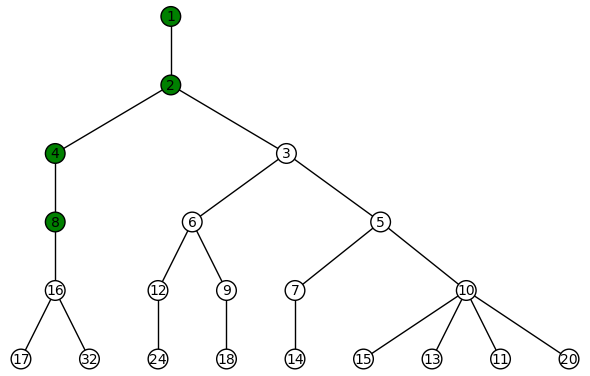

In [32]:
show_tree(Tree_method(5), 8)

На графе видно, что, для получения $x^8$ цепочка будет следующей:

$x \rightarrow x^2 \rightarrow x^4 \rightarrow x^8$

Количество операций - 3. Для этого же числа методу *SX* потребовалось 3 операции, методу возведения в степень справа-налево - 4, а методу множителей - 3.

#### Вывод

Реализован метод возведения в степень при помощи дерева степеней. Обнаружено, что данный метод не медленее методов *SX*, возведения в степень справа-налево и метода множителей.

## Выводы

В ходе выполнения работы были сформированы знания о работе алгоритмов вычисления мономов за минимальное число операций, привит навык использования системы компьютерной математики *SageMath* для реализации алгоритмов. <br>
Реализованы такии алгоритмы как: бинарный метод *SX*, бинарный метод возвдения в степень справа-налево, метод множителей, а также метод возведения в степень с использованием дерева степеней. Также проведено сравнение теоретической и практической сложностей упомянутых алгоритмов.